In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
pwd= os.getcwd()

In [3]:
data= pd.read_csv(pwd+"\coursea_data.csv")

In [4]:
data

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


### Context
This is a dataset i generated during a hackathon for project purpose. Here i have scrapped data from Coursera official web site. Our project aims to help any new learner get the right course to learn by just answering a few questions. It is an intelligent course recommendation system. Hence we had to scrap data from few educational websites. This is data scrapped from Coursera website. For the project visit: https://github.com/Siddharth1698/Coursu . Please do show your support by following us. I have just started to learn on data science and hope this dataset will be helpful to someone for his/her personal purposes. The scrapping code is here : https://github.com/Siddharth1698/Coursera-Course-Dataset
Article about the dataset generation : https://medium.com/analytics-vidhya/web-scraping-and-coursera-8db6af45d83f

### Content
This dataset contains mainly 6 columns and 890 course data. The detailed description:

    1. course_title : Contains the course title.
    2. course_organization : It tells which organization is conducting the courses.
    3. courseCertificatetype : It has details about what are the different certifications available in courses.
    4. course_rating : It has the ratings associated with each course.
    5. course_difficulty : It tells about how difficult or what is the level of the course.
    6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

In [5]:
data.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


In [6]:
data["Unnamed: 0"].sort_values()

420      0
486      1
815      2
688      3
392      4
      ... 
838    886
635    887
59     888
885    889
147    890
Name: Unnamed: 0, Length: 891, dtype: int64

In [7]:
## lets treat Unnamed: 0 as ID

In [8]:
data.rename(columns={"Unnamed: 0": "ID"}, inplace=True)

In [9]:
## Shape of data: 891x7
## Size of data: 6237
## data.size

In [10]:
## check for missing values
data.isna().sum()  ## do not have missing values in the data

ID                          0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [11]:
## check for the data types of each feature
data.dtypes.reset_index()

,index,0
0,ID,int64
1,course_title,object
2,course_organization,object
3,course_Certificate_type,object
4,course_rating,float64
5,course_difficulty,object
6,course_students_enrolled,object


In [12]:
def split_columns(data):
    categorical_col= data.select_dtypes(include= ['object','category']).columns.tolist()
    numerical_col= data.select_dtypes(include= ['int64','float64']).columns.tolist()
    return categorical_col, numerical_col

In [13]:
cat,num= split_columns(data)

In [14]:
cat

['course_title',
 'course_organization',
 'course_Certificate_type',
 'course_difficulty',
 'course_students_enrolled']

In [15]:
num

['ID', 'course_rating']

In [16]:
data.nunique()

ID                          891
course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

In [17]:
for key in cat:
    if(not (key == 'course_title' or key=='course_organization' or key=='course_students_enrolled' )):
        print(key,":",data[key].unique())

course_Certificate_type : ['SPECIALIZATION' 'COURSE' 'PROFESSIONAL CERTIFICATE']
course_difficulty : ['Beginner' 'Intermediate' 'Mixed' 'Advanced']


In [18]:
data['course_organization'].value_counts()

University of Pennsylvania                               59
University of Michigan                                   41
Google Cloud                                             34
Johns Hopkins University                                 28
Duke University                                          28
                                                         ..
MathWorks                                                 1
Osmosis                                                   1
ScrumTrek                                                 1
Peter the Great St. Petersburg Polytechnic University     1
Relay Graduate School of Education                        1
Name: course_organization, Length: 154, dtype: int64

E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


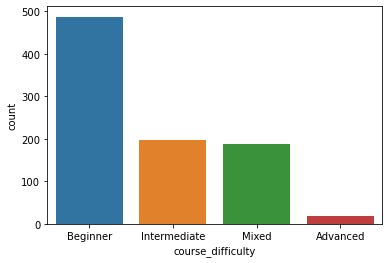

In [19]:
sns.countplot(data['course_difficulty']);

E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


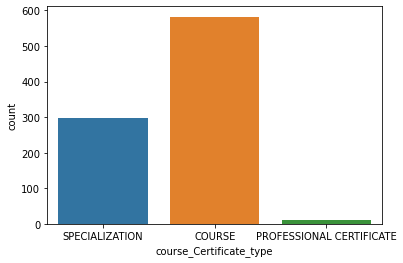

In [20]:
sns.countplot(data['course_Certificate_type']);

E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


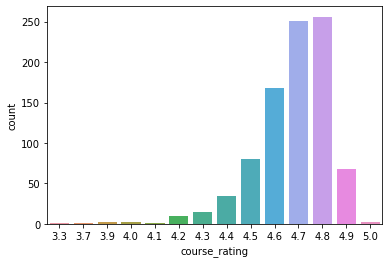

In [21]:
sns.countplot(data['course_rating']);

In [22]:
ratio= pd.DataFrame(pd.value_counts(data['course_organization'])/(sum(pd.value_counts(data['course_organization']))))
ratio

,course_organization
University of Pennsylvania,0.066218
University of Michigan,0.046016
Google Cloud,0.038159
Johns Hopkins University,0.031425
Duke University,0.031425
...,...
MathWorks,0.001122
Osmosis,0.001122
ScrumTrek,0.001122
Peter the Great St. Petersburg Polytechnic University,0.001122


In [23]:
df= pd.value_counts(data['course_organization'])/(sum(pd.value_counts(data['course_organization'])))*100

In [24]:
df

University of Pennsylvania                               6.621773
University of Michigan                                   4.601571
Google Cloud                                             3.815937
Johns Hopkins University                                 3.142536
Duke University                                          3.142536
                                                           ...   
MathWorks                                                0.112233
Osmosis                                                  0.112233
ScrumTrek                                                0.112233
Peter the Great St. Petersburg Polytechnic University    0.112233
Relay Graduate School of Education                       0.112233
Name: course_organization, Length: 154, dtype: float64

In [25]:
data2= {'Organization': df.keys(),'Ratio': df[df.keys()]}

In [26]:
df2= pd.DataFrame(data2)

In [27]:
df2.describe(percentiles= [0.10,0.20,0.25,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.90])  # min ratio= 0.112233


,Ratio
count,154.000000
mean,0.649351
std,0.896304
min,0.112233
10%,0.112233
20%,0.112233
25%,0.112233
30%,0.112233
40%,0.224467
50%,0.336700


(array([115.,  21.,   7.,   5.,   3.,   1.,   1.,   0.,   0.,   1.]),
 array([0.11223345, 0.76318743, 1.41414141, 2.0650954 , 2.71604938,
        3.36700337, 4.01795735, 4.66891134, 5.31986532, 5.9708193 ,
        6.62177329]),
 <a list of 10 Patch objects>)

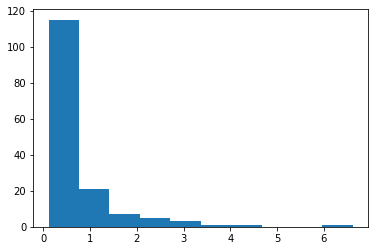

In [28]:
plt.hist(df2["Ratio"])

In [29]:
df2= df2[df2['Ratio']>0.76318743]    ## ratio greater than 0.76318743
## cut the hist from 0.76318743

In [30]:
r= 100-df2['Ratio'].sum()

In [31]:
r

32.210998877665546

In [32]:
df2= df2.append(pd.DataFrame({"Organization": "Misc", "Ratio":r}, index=[0]))

In [33]:
labels= df2['Organization'].unique()

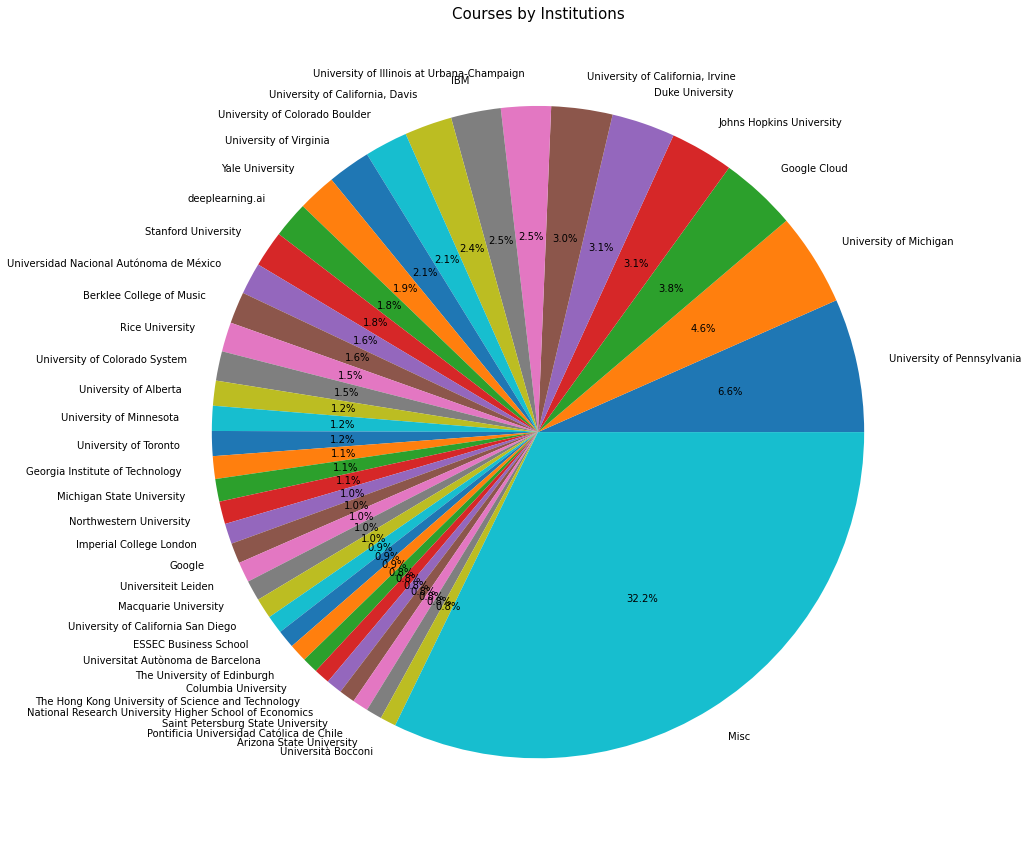

In [34]:
pie, ax= plt.subplots(figsize=[15,15])
labels= df2['Organization'].unique()
plt.pie(x= df2['Ratio'], autopct= "%.1f%%", labels=labels, pctdistance=.6)
plt.title("Courses by Institutions", fontsize= 15);

In [35]:
data2 = pd.DataFrame(data.course_students_enrolled.str.extract(r'([-]?[\d.]*)([\w\D]*)').rename(columns={0:'VALUE', 1:'UNIT'}))

In [36]:
data2

,VALUE,UNIT
0,5.3,k
1,17,k
2,130,k
3,91,k
4,320,k
...,...,...
886,52,k
887,21,k
888,30,k
889,9.8,k


In [37]:
data2

,VALUE,UNIT
0,5.3,k
1,17,k
2,130,k
3,91,k
4,320,k
...,...,...
886,52,k
887,21,k
888,30,k
889,9.8,k


In [38]:
data2['VALUE']= data2['VALUE'].astype('float')
data2["students_enrolled"]= data2.apply(lambda x: x.VALUE*1 if x.UNIT=='k' else (x.VALUE*1000 if x.UNIT=='m' else x.VALUE/1000), axis=1)

In [39]:
data2["UNIT"].unique()

array(['k', 'm'], dtype=object)

In [40]:
data2[data2["UNIT"]=='m']

,VALUE,UNIT,students_enrolled
564,3.2,m,3200.0
674,1.3,m,1300.0
688,1.5,m,1500.0
815,2.5,m,2500.0


In [41]:
data['students_enrolled(thousands)']= data2['students_enrolled']
data= data.drop(columns= ['course_students_enrolled'])

In [42]:
data

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students_enrolled(thousands)
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17.0
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130.0
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91.0
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320.0
...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52.0
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21.0
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30.0
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8


In [43]:
data['student_cat']= data.apply(lambda x: '>500k' if x['students_enrolled(thousands)']>=500
                               else('>100k and <500k' if (x['students_enrolled(thousands)']>=100 and x['students_enrolled(thousands)']<500)
                                   else('>10k and <100k' if (x['students_enrolled(thousands)']>10 and x['students_enrolled(thousands)']<100)
                                       else('<10k'))), axis=1)

In [44]:
data

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students_enrolled(thousands),student_cat
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3,<10k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17.0,>10k and <100k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130.0,>100k and <500k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91.0,>10k and <100k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320.0,>100k and <500k
...,...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52.0,>10k and <100k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21.0,>10k and <100k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30.0,>10k and <100k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8,<10k


E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


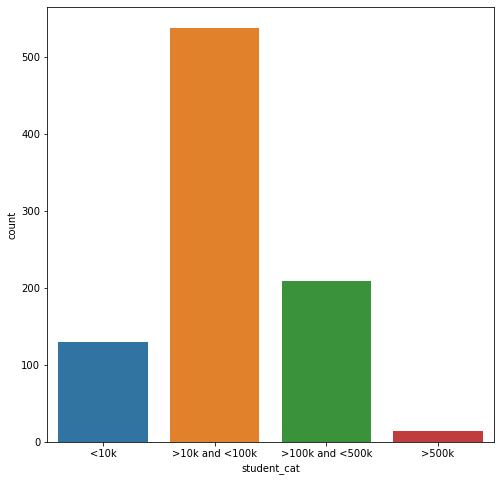

In [45]:
plt.subplots(figsize=(8,8))
sns.countplot(data['student_cat']);

In [46]:
key= 'students_enrolled(thousands)'

In [47]:
#by no.of students

data= data.sort_values(by=key, ascending= False)
data_top= data.head(50)
data_top

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students_enrolled(thousands),student_cat
564,6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0,>500k
815,2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500.0,>500k
688,3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500.0,>500k
674,47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300.0,>500k
196,13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830.0,>500k
129,44,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790.0,>500k
261,175,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760.0,>500k
765,40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750.0,>500k
199,15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740.0,>500k
211,5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690.0,>500k


### Courses with ML, DL, JAVA, Python, data science in them

In [48]:
def determine_count(data,key):
    lists=[]
    for course in data['course_title']:
        if key in course:
            lists.append(course)
    return len(lists)

In [49]:
subject=['Machine Learning','Deep Learning','Data Analysis','Python','Reinforcement Learning','Statistics','Mathematics', 'Java', 'Data Science']

In [50]:
print("\t Course count")
for s in subject:
    print("\t",s,":" , determine_count(data_top,s))

	 Course count
	 Machine Learning : 2
	 Deep Learning : 2
	 Data Analysis : 0
	 Python : 6
	 Reinforcement Learning : 0
	 Statistics : 0
	 Mathematics : 0
	 Java : 2
	 Data Science : 7


E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


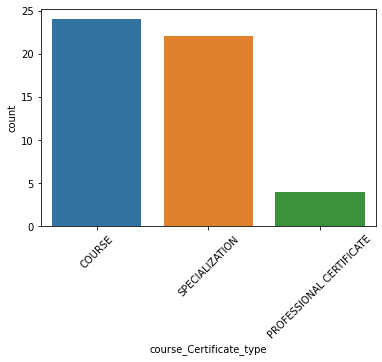

In [51]:
chart= sns.countplot(data_top["course_Certificate_type"] );
chart. set_xticklabels(chart. get_xticklabels(), rotation=45);

E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


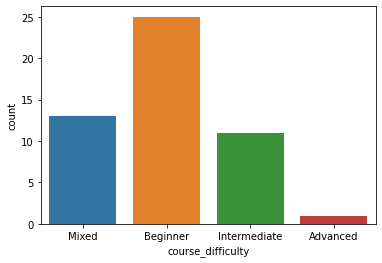

In [52]:
sns.countplot(data_top["course_difficulty"]);

### By ratings

In [53]:
data= data.sort_values(by='course_rating', ascending=False)
data_top_rating= data.head(50)
data_top_rating

,ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students_enrolled(thousands),student_cat
251,789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5,<10k
432,401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6,<10k
290,278,Everyday Parenting: The ABCs of Child Rearing,Yale University,COURSE,4.9,Beginner,86.0,>10k and <100k
884,841,Основы разработки на C++: белый пояс,E-Learning Development Fund,COURSE,4.9,Intermediate,41.0,>10k and <100k
815,2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500.0,>500k
615,652,Mountains 101,University of Alberta,COURSE,4.9,Mixed,44.0,>10k and <100k
250,636,Egiptología (Egyptology),Universitat Autònoma de Barcelona,COURSE,4.9,Beginner,46.0,>10k and <100k
495,377,Introduction to Forensic Science,"Nanyang Technological University, Singapore",COURSE,4.9,Mixed,47.0,>10k and <100k
99,72,"Brand Management: Aligning Business, Brand and...",London Business School,COURSE,4.9,Beginner,57.0,>10k and <100k
781,234,"TESOL Certificate, Part 2: Teach English Now!",Arizona State University,SPECIALIZATION,4.9,Beginner,62.0,>10k and <100k


E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


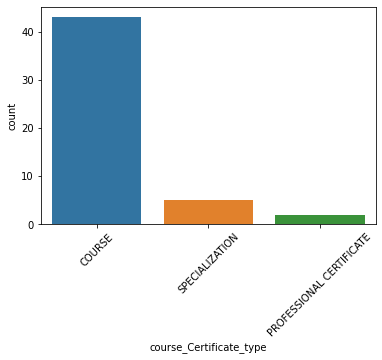

In [54]:
chart= sns.countplot(data_top_rating['course_Certificate_type']);
chart. set_xticklabels(chart. get_xticklabels(), rotation=45);

E:\Users\deban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


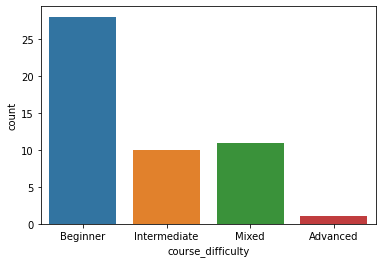

In [55]:
sns.countplot(data_top_rating['course_difficulty']);